 Données chargées avec succès !
Dimensions : (506, 13)

Aperçu des données :


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


 Statistiques descriptives des caractéristiques :


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000



 Statistiques descriptives de la cible (MEDV) :


,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


 Vérification des valeurs manquantes :
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

 Données normalisées avec succès.
 Performances des modèles :
--- Régression simple (RM) ---
R² : 0.371
RMSE : 6.793

--- Régression multiple (RM + LSTAT) ---
R² : 0.574
RMSE : 5.590


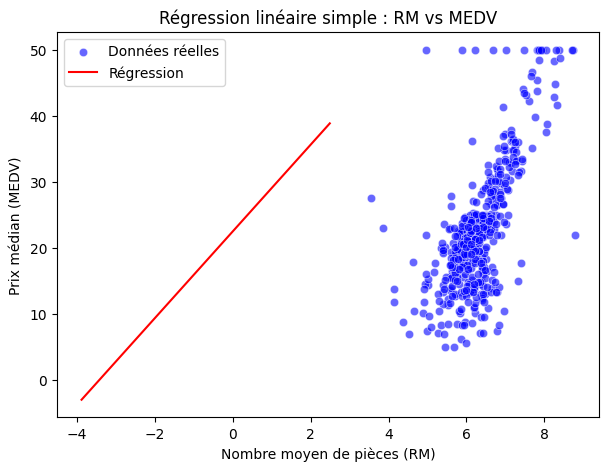

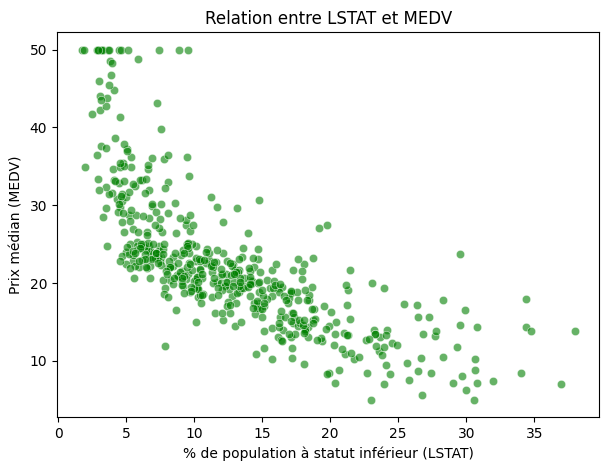

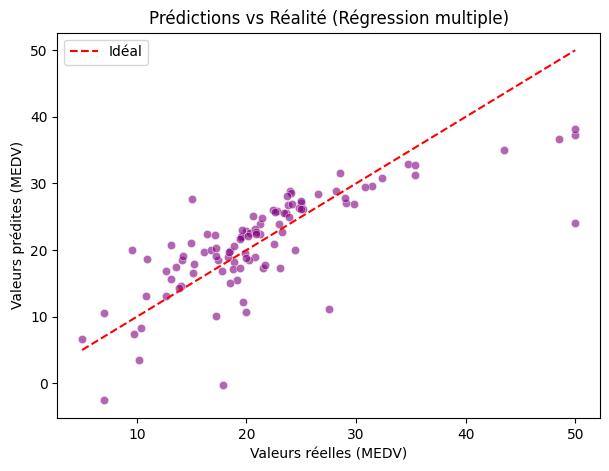

 Conclusion :
- La variable RM (nombre moyen de pièces) est positivement corrélée au prix des maisons.
- La variable LSTAT (statut socio-économique) est négativement corrélée au prix.
- Le modèle multiple (RM + LSTAT) offre de meilleures performances (R² plus élevé, RMSE plus faible).


In [ ]:

# ------------------------------------------------------------
# 1️ Importation des librairies et des données
# ------------------------------------------------------------

from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le jeu de données Boston Housing
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Séparer les variables explicatives (X) et la cible (y)
X = boston.data
y = boston.target

print(" Données chargées avec succès !")
print("Dimensions :", X.shape)
print("\nAperçu des données :")
display(X.head())

# ------------------------------------------------------------
# 2️ Statistiques descriptives
# ------------------------------------------------------------

print(" Statistiques descriptives des caractéristiques :")
display(X.describe())

print("\n Statistiques descriptives de la cible (MEDV) :")
display(pd.DataFrame(y).describe())

# ------------------------------------------------------------
# 3️ Nettoyage et préparation des données
# ------------------------------------------------------------

# Vérification des valeurs manquantes
print(" Vérification des valeurs manquantes :")
print(X.isnull().sum())

# Standardisation des caractéristiques
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("\n Données normalisées avec succès.")

# ------------------------------------------------------------
# 4️ Sélection des caractéristiques
# ------------------------------------------------------------

# Régression simple : une seule variable (RM)
X_simple = X_scaled[["RM"]]

# Régression multiple : deux variables (RM, LSTAT)
X_multiple = X_scaled[["RM", "LSTAT"]]

# ------------------------------------------------------------
# 5️ Division en ensembles d'entraînement et de test
# ------------------------------------------------------------

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 6️ Modélisation : Régression Linéaire Simple et Multiple
# ------------------------------------------------------------

# ---- Régression simple (RM)
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)

# ---- Régression multiple (RM + LSTAT)
model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)
y_pred_m = model_multiple.predict(X_test_m)

# ------------------------------------------------------------
# 7️ Évaluation des modèles
# ------------------------------------------------------------

# --- R² et RMSE pour chaque modèle
r2_simple = r2_score(y_test_s, y_pred_s)
r2_multiple = r2_score(y_test_m, y_pred_m)

rmse_simple = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
rmse_multiple = np.sqrt(mean_squared_error(y_test_m, y_pred_m))

print(" Performances des modèles :")
print(f"--- Régression simple (RM) ---")
print(f"R² : {r2_simple:.3f}")
print(f"RMSE : {rmse_simple:.3f}")

print(f"\n--- Régression multiple (RM + LSTAT) ---")
print(f"R² : {r2_multiple:.3f}")
print(f"RMSE : {rmse_multiple:.3f}")

# ------------------------------------------------------------
# 8️ Visualisations
# ------------------------------------------------------------

# (a) Relation RM vs MEDV
plt.figure(figsize=(7,5))
sns.scatterplot(x=X["RM"], y=y, color="blue", alpha=0.6, label="Données réelles")
sns.lineplot(x=X_test_s["RM"], y=y_pred_s, color="red", label="Régression")
plt.title("Régression linéaire simple : RM vs MEDV")
plt.xlabel("Nombre moyen de pièces (RM)")
plt.ylabel("Prix médian (MEDV)")
plt.legend()
plt.show()

# (b) Relation LSTAT vs MEDV
plt.figure(figsize=(7,5))
sns.scatterplot(x=X["LSTAT"], y=y, color="green", alpha=0.6)
plt.title("Relation entre LSTAT et MEDV")
plt.xlabel("% de population à statut inférieur (LSTAT)")
plt.ylabel("Prix médian (MEDV)")
plt.show()

# (c) Valeurs réelles vs prédictions (modèle multiple)
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test_m, y=y_pred_m, color="purple", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Idéal")
plt.xlabel("Valeurs réelles (MEDV)")
plt.ylabel("Valeurs prédites (MEDV)")
plt.title("Prédictions vs Réalité (Régression multiple)")
plt.legend()
plt.show()

# ------------------------------------------------------------
# 9️ Conclusion
# ------------------------------------------------------------

print(" Conclusion :")
print("- La variable RM (nombre moyen de pièces) est positivement corrélée au prix des maisons.")
print("- La variable LSTAT (statut socio-économique) est négativement corrélée au prix.")
print("- Le modèle multiple (RM + LSTAT) offre de meilleures performances (R² plus élevé, RMSE plus faible).")
